<a href="https://colab.research.google.com/github/stepanjaburek/quantum_social_science_lr/blob/main/permutated_tests_colab_HCPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Social Science: PCA and Cluster Analysis of the Literature

#Setup

In [ ]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from IPython.display import display

In [10]:
from google.colab import drive
drive.mount('/content/drive') # this asks for your google account
# load data from our private google folder shared among us
data = pd.read_excel("/content/drive/MyDrive/QSS_Colab/keyword_data.xlsx")
metadata = pd.read_excel("/content/drive/MyDrive/QSS_Colab/metadata.xlsx")
data1 = pd.read_excel("/content/drive/MyDrive/QSS_Colab/1_dataset_with_all_21_variables.xlsx")
data2 = pd.read_excel("/content/drive/MyDrive/QSS_Colab/2_dataset_with_just_6_variables.xlsx")
data3 = pd.read_excel("/content/drive/MyDrive/QSS_Colab/3_permutation_in_columns.xlsx")
data4 = pd.read_excel("/content/drive/MyDrive/QSS_Colab/4_permutation_in_columns_6_stays.xlsx")
data5 = pd.read_excel("/content/drive/MyDrive/QSS_Colab/5_permutation_in_columns_15_stays.xlsx")
data6 = pd.read_excel("/content/drive/MyDrive/QSS_Colab/6_permutation_in_rows.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data cleaning

In [12]:
data2.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data2 = data2.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data2 = data2.drop(1166)

In [ ]:
data3.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data3 = data3.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data3 = data3.drop(1166)

In [ ]:
data4.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data4 = data4.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data4 = data4.drop(1166)

In [ ]:
data5.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data5 = data5.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data5 = data5.drop(1166)

In [ ]:
data6.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data6 = data6.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data6 = data6.drop(1166)

In [15]:
df=data2

In [19]:
#metadata.insert(0, 'id', range(1, len(metadata) + 1)) #id numbering
df.insert(0, 'id', range(1, len(df) + 1))

# Keywords

In [20]:
df = df[df.iloc[:, 2:23].sum(axis=1) > 0].reset_index(drop=True)

In [ ]:
#[(i, list(df.keys())[i]) for i in range(len(df.keys()))]

# Scaling in the rows

In [21]:
# create features for the pca
features = df.drop(['filename', 'id'], axis=1)
feature_names = features.columns

# Normalize row-wise
features = features.div(features.sum(axis=1), axis=0)# row normalization as Michael suggested, dividing the values by the sum of their row (paper)
#features = StandardScaler().fit_transform(features.T).T # Z-score standardization on transposed data to work in rows

# Convert back to DataFrame
features = pd.DataFrame(features, columns=feature_names)

In [22]:
features

,entanglement,interference,observer effect,superposition,uncertainty,uncertainty principle
0,0.068966,0.379310,0.0,0.137931,0.344828,0.068966
1,0.083333,0.083333,0.0,0.166667,0.500000,0.166667
2,0.277778,0.555556,0.0,0.111111,0.055556,0.000000
3,0.125000,0.500000,0.0,0.000000,0.375000,0.000000
4,0.000000,0.857143,0.0,0.142857,0.000000,0.000000
...,...,...,...,...,...,...
971,0.166667,0.333333,0.0,0.333333,0.166667,0.000000
972,0.105634,0.760563,0.0,0.112676,0.021127,0.000000
973,0.065574,0.081967,0.0,0.081967,0.639344,0.131148
974,0.333333,0.000000,0.0,0.666667,0.000000,0.000000


# Data analysis

#PCA

Explained variance ratio: [0.39002201 0.33253546 0.25868652 0.0135567  0.00519931 0.        ]


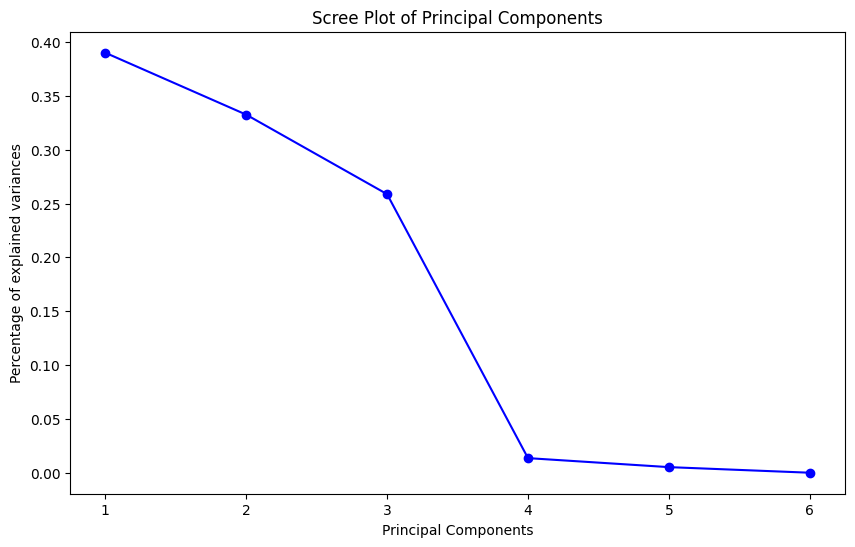

                                     feature   PC   loading
uncertainty                      uncertainty  PC1  0.832156
superposition                  superposition  PC1 -0.433631
entanglement                    entanglement  PC1 -0.327611
interference                    interference  PC1 -0.105071
uncertainty principle  uncertainty principle  PC1  0.033331
interference                    interference  PC2  0.860594
entanglement                    entanglement  PC2 -0.390144
superposition                  superposition  PC2 -0.269733
uncertainty                      uncertainty  PC2 -0.184890
uncertainty principle  uncertainty principle  PC2 -0.014968
superposition                  superposition  PC3  0.703355
entanglement                    entanglement  PC3 -0.701713
interference                    interference  PC3 -0.080439
uncertainty                      uncertainty  PC3  0.080003
observer effect              observer effect  PC3 -0.003733
uncertainty principle  uncertainty princ

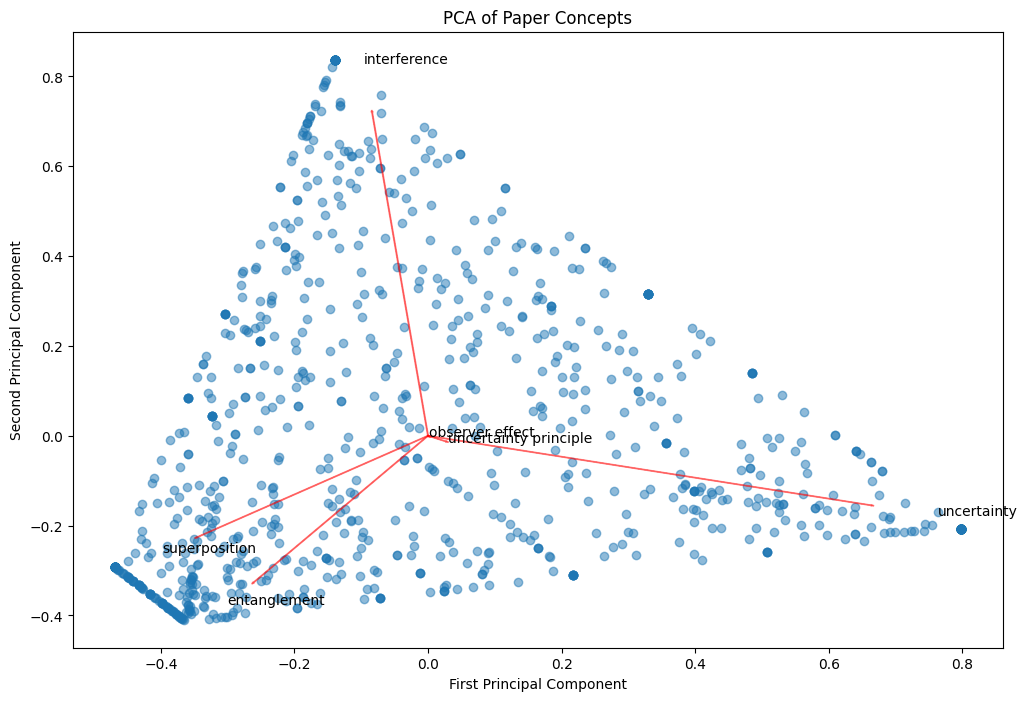

,feature,PC,loading
uncertainty,uncertainty,PC1,0.832156
uncertainty principle,uncertainty principle,PC1,0.033331
interference,interference,PC1,-0.105071
entanglement,entanglement,PC1,-0.327611
superposition,superposition,PC1,-0.433631
interference,interference,PC2,0.860594
uncertainty principle,uncertainty principle,PC2,-0.014968
uncertainty,uncertainty,PC2,-0.184890
superposition,superposition,PC2,-0.269733
entanglement,entanglement,PC2,-0.390144


In [23]:
pca = PCA()
pca_result = pca.fit_transform(features)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df.insert(0, 'id', df['id'].values)

print("Explained variance ratio:", pca.explained_variance_ratio_[:10])

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of explained variances')
plt.show()

# Feature importance in components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features.columns
)

# Top 5 features per component
top_loadings = pd.DataFrame()
for pc in loadings.columns:
    top_5 = pd.DataFrame({
        'feature': loadings.index,
        'PC': pc,
        'loading': loadings[pc]
    })

    top_5 = top_5.reindex(top_5['loading'].abs().sort_values(ascending=False).index)
    top_5 = top_5.head(5)
    top_loadings = pd.concat([top_loadings, top_5])

print(top_loadings)

# PC1 and 2
pc12_loadings = top_loadings[top_loadings['PC'].isin(['PC1', 'PC2', 'PC3', 'PC4'])]
pc12_loadings = pc12_loadings.sort_values(['PC', 'loading'],
                                         ascending=[True, False])
print(pc12_loadings)

# PCA biplot
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

for i, feature in enumerate(features.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*max(abs(pca_result[:, 0])),
              pca.components_[1, i]*max(abs(pca_result[:, 1])),
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*max(abs(pca_result[:, 0]))*1.15,
             pca.components_[1, i]*max(abs(pca_result[:, 1]))*1.15,
             feature)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Paper Concepts')
plt.show()
display(pc12_loadings)

How many PCs do we want? Literature says probably a sum between 80-90% of explained variance

Number of components needed to explain 80% of variance: 3


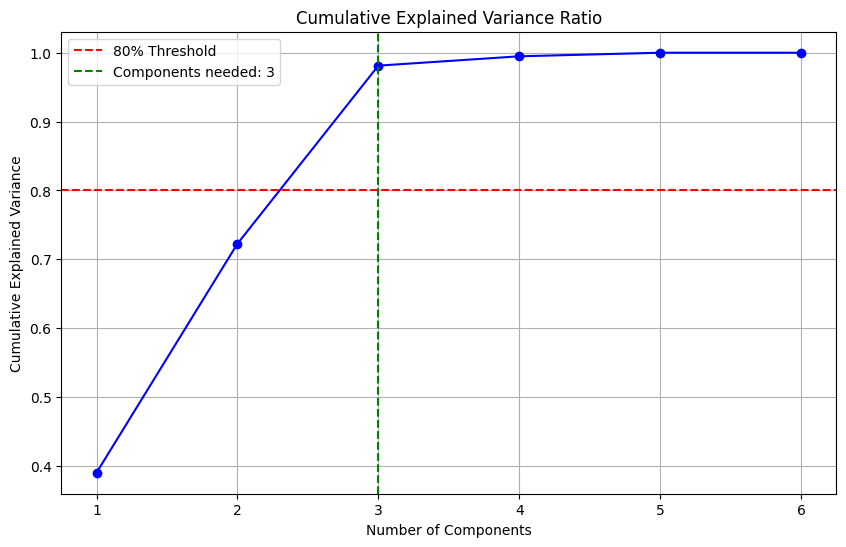


Cumulative explained variance for first 10 components:
Components 1-1: 0.390
Components 1-2: 0.723
Components 1-3: 0.981
Components 1-4: 0.995
Components 1-5: 1.000
Components 1-6: 1.000


IndexError: index 6 is out of bounds for axis 0 with size 6

In [24]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Find number of components needed for 80% variance (we can change this)
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f"Number of components needed to explain 80% of variance: {n_components_80}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio,
         'bo-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.axvline(x=n_components_80, color='g', linestyle='--',
            label=f'Components needed: {n_components_80}')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print("\nCumulative explained variance for first 10 components:")
for i in range(10):
    print(f"Components 1-{i+1}: {cumulative_variance_ratio[i]:.3f}")

# Hierarchical Clustering on Principal Components (HCPC)

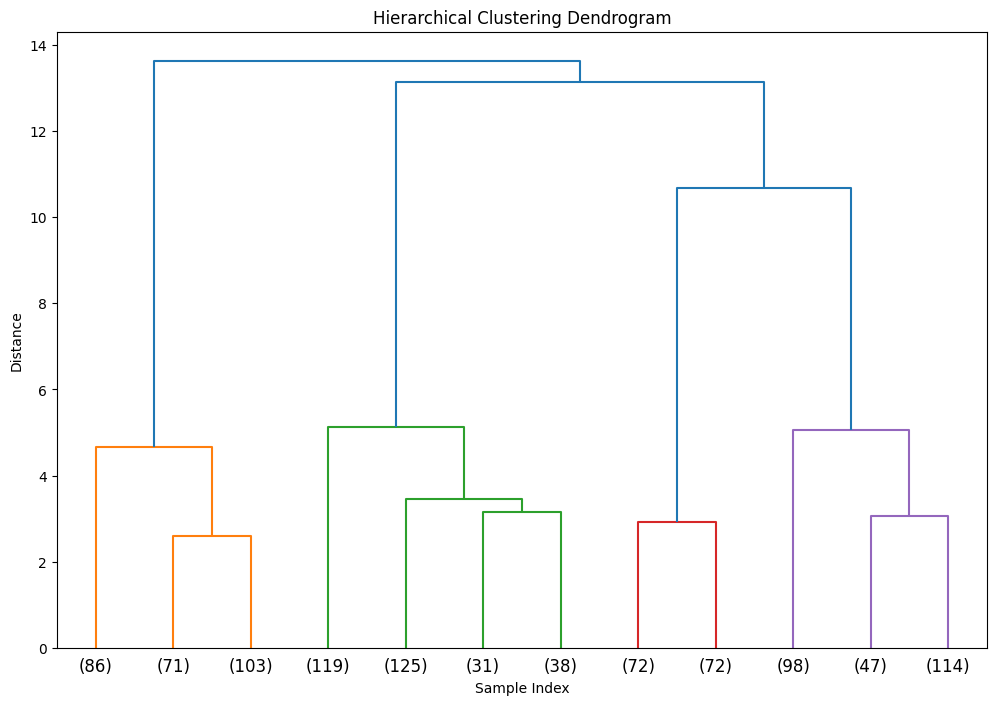

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 1. Define how many PCs to use
n_components = 7 # I think we should use between 7 and 9 based on the PCA
selected_components = pca_result[:, :n_components]

# 2. Hierarchical clustering uisng Ward
linked = linkage(selected_components, method='ward') # the methods can be different. Ward method is the one we use in Ipsos and seemingly the typical choice in the literature

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

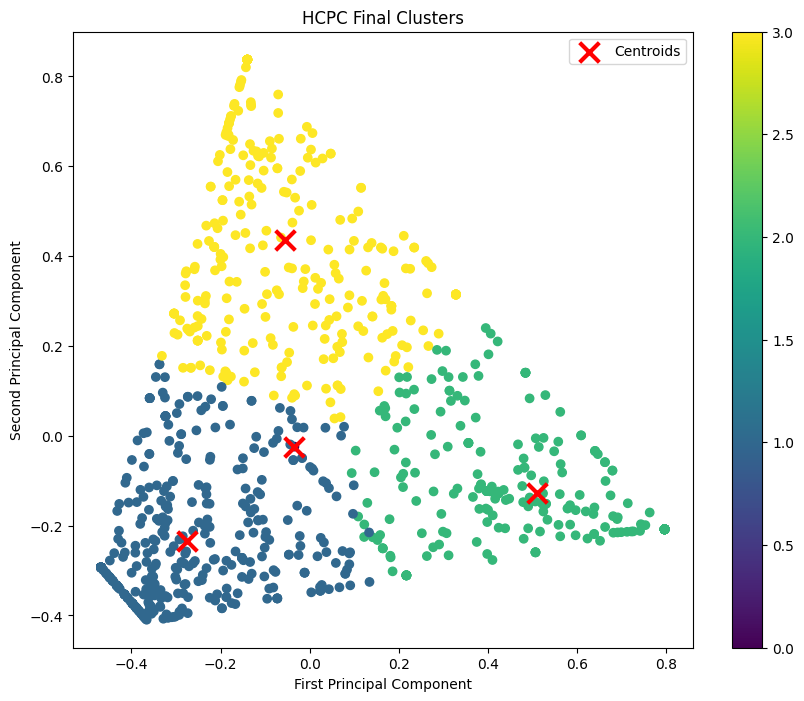

In [26]:
# 3. Get initial clusters from hierarchical clustering # optional step though, we dont really need them
n_clusters = 4
#hc_labels = fcluster(linked, n_clusters, criterion='maxclust')


# 4. K-means to finalize things
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(selected_components)
final_labels = kmeans.labels_


# Visualize final clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=final_labels, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.colorbar(scatter)
plt.title('HCPC Final Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


K-Medoids as an alternative ending

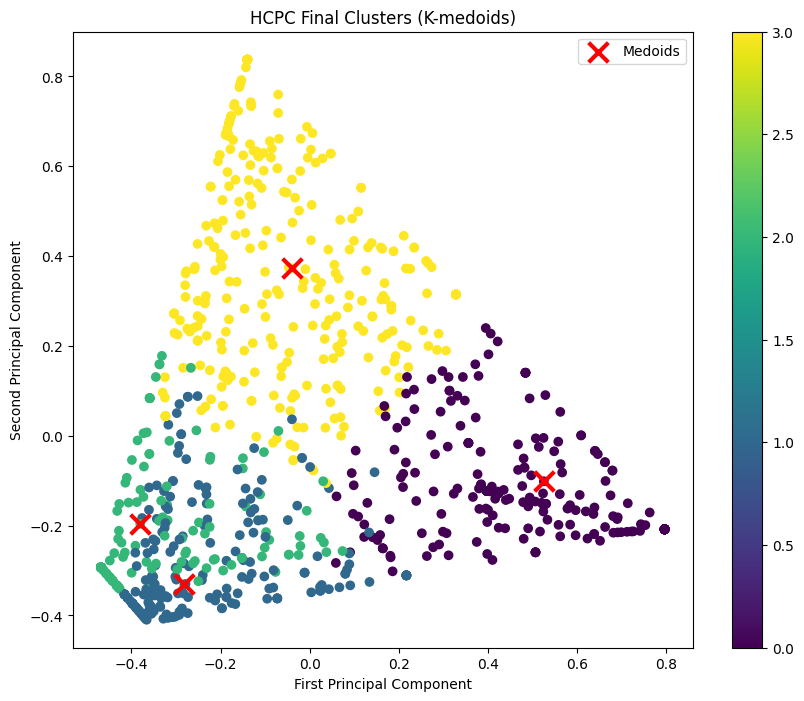

In [27]:
kmedoids = KMedoids(n_clusters=n_clusters,
                    random_state=42,
                    metric='euclidean')
kmedoids.fit(selected_components)
final_labels = kmedoids.labels_

# Visualize final clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=final_labels, cmap='viridis')

# Get medoid locations in PCA space
medoid_indices = kmedoids.medoid_indices_
medoid_locations = pca_result[medoid_indices]

# Plot medoids
plt.scatter(medoid_locations[:, 0], medoid_locations[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Medoids')

plt.colorbar(scatter)
plt.title('HCPC Final Clusters (K-medoids)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

# Get central papers from the HCPC

Kmeans

In [248]:
import numpy as np
import pandas as pd

# Assuming kmedoids.medoid_indices_ contains indices, not coordinates
medoid_indices = kmedoids.medoid_indices_

# List to store results for each cluster
top_centroids = []

# For each medoid index
for i, medoid_idx in enumerate(medoid_indices):
    # Get the actual coordinates of this medoid
    medoid_coords = pca_result[medoid_idx, :7]

    # Calculate distances from each point to this medoid
    distances = np.sum((pca_result[:, :7] - medoid_coords)**2, axis=1)

    # Get indices of top 10 closest points
    top_indices = np.argsort(distances)[:10]

    # Create dataframe for this cluster
    cluster_df = pd.DataFrame({
        'cluster': i+1,  # 1-based cluster numbering
        'rank': range(1, 11),  # 1-10 rankings
        'centroid_id': df['id'].iloc[top_indices].values,
        'filename': df['filename'].iloc[top_indices].values,
        'distance': distances[top_indices]
    })

    # Add to list
    top_centroids.append(cluster_df)

# Combine all clusters
centroids = pd.concat(top_centroids, ignore_index=True)

# Join with metadata
centerpapers = pd.merge(centroids, metadata, left_on='filename', right_on='file_name', how='left')

# Join full dataset with metadata
dataset = pd.merge(data, metadata, left_on='filename', right_on='file_name', how='left')

In [249]:
centerpapers

,cluster,rank,centroid_id,filename,distance,id,Key,file_name,Item Type,Publication Year,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,1,1,809,Melo-Luna et al_2017_Quantum Locality in Game ...,0.000000,809.0,JYTFZ8DQ,Melo-Luna et al_2017_Quantum Locality in Game ...,journalArticle,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,204,Beltran_Geriente_2019_Quantum Entanglement in ...,0.005968,204.0,NYQFKVV6,Beltran_Geriente_2019_Quantum Entanglement in ...,journalArticle,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,879,Orrell_2023_Quantum Financial Entanglement.pdf,0.006275,879.0,M5V7K9T3,Orrell_2023_Quantum Financial Entanglement.pdf,bookSection,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,556,Huang et al_2021_An improved lotka–volterra mo...,0.008389,556.0,LKRJFQSD,Huang et al_2021_An improved lotka–volterra mo...,journalArticle,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,886,Ozdemir et al_2007_A necessary and sufficient ...,0.008518,886.0,Z62W7S4I,Ozdemir et al_2007_A necessary and sufficient ...,journalArticle,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,390,Eisert et al_1999_Quantum Games and Quantum St...,0.008541,390.0,D6HWMQGQ,Eisert et al_1999_Quantum Games and Quantum St...,journalArticle,1999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,392,Elgazzar_2019_Unique Solution to the Quantum P...,0.008560,392.0,DPLTMTNM,Elgazzar_2019_Unique Solution to the Quantum P...,journalArticle,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,337,Daranyi_Wittek_2016_Conceptual Machinery of th...,0.011595,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,411,Fierke_2024_Perspective chapter2.pdf,0.011697,411.0,K8MLXTT8,Fierke_2024_Perspective chapter2.pdf,bookSection,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,1052,Tressoldi_Khrennikov_2012_Remote state prepara...,0.012201,1052.0,IDKLSDI3,Tressoldi_Khrennikov_2012_Remote state prepara...,journalArticle,2012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# K-Means vs K-Medoids

Adjusted Rand Index: 0.853
Adjusted Mutual Information: 0.819
Normalized Mutual Information: 0.820

Confusion Matrix (normalized by row):
col_0         0         1         2         3
row_0                                        
0      0.000000  0.000000  0.937853  0.062147
1      0.939560  0.000000  0.000000  0.060440
2      0.000000  0.000000  0.037441  0.962559
3      0.000000  0.913333  0.006667  0.080000
All    0.148696  0.119130  0.166087  0.566087


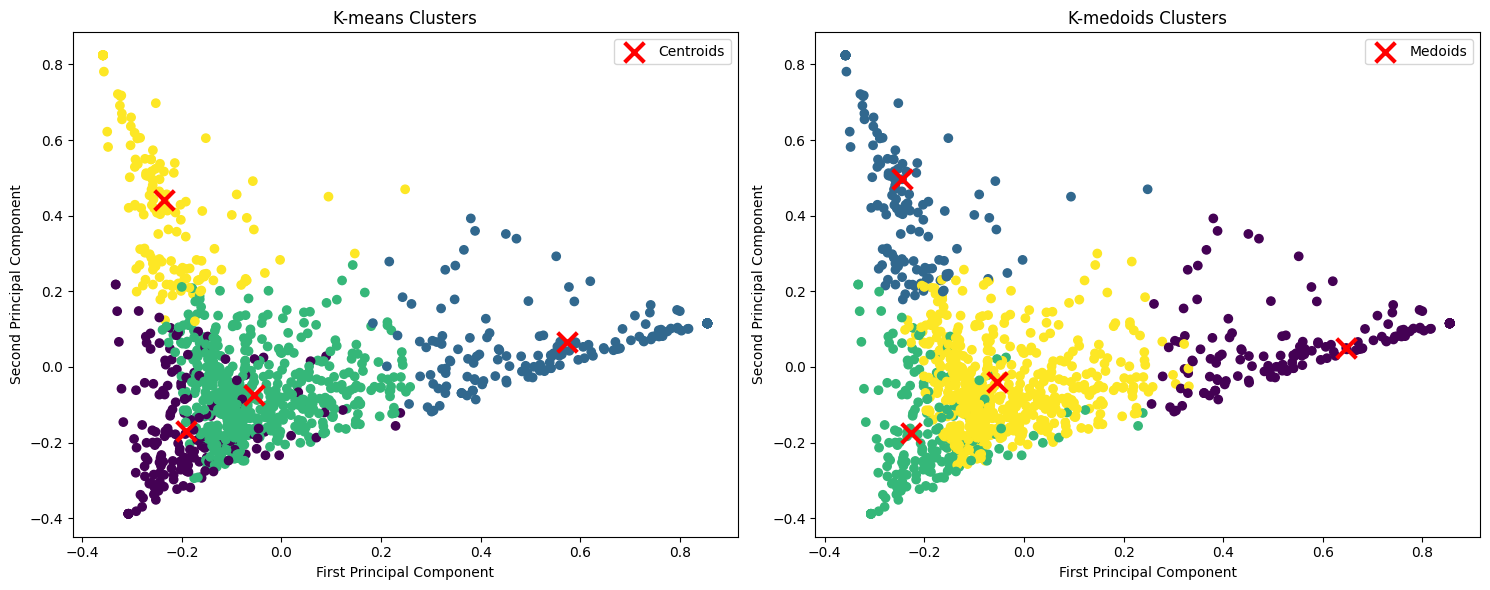

In [250]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score
kmeans_labels = kmeans.labels_
kmedoids_labels = kmedoids.labels_

# similarity metrics
ari = adjusted_rand_score(kmeans_labels, kmedoids_labels)
ami = adjusted_mutual_info_score(kmeans_labels, kmedoids_labels)
nmi = normalized_mutual_info_score(kmeans_labels, kmedoids_labels)

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Adjusted Mutual Information: {ami:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")

confusion_matrix = pd.crosstab(
    kmeans_labels,
    kmedoids_labels,
    margins=True,
    normalize='index'
)
print("\nConfusion Matrix (normalized by row):")
print(confusion_matrix)

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means plot
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
ax1.set_title('K-means Clusters')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.legend()

# K-medoids plot
scatter2 = ax2.scatter(pca_result[:, 0], pca_result[:, 1], c=kmedoids_labels, cmap='viridis')
ax2.scatter(medoid_locations[:, 0], medoid_locations[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Medoids')
ax2.set_title('K-medoids Clusters')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.legend()

plt.tight_layout()
plt.show()

Adjusted Rand Index: 0.853
Adjusted Mutual Information: 0.819
Normalized Mutual Information: 0.820

Confusion Matrix (counts):
K-medoids    0    1    2    3  Total
K-means                             
0            0    0  166   11    177
1          171    0    0   11    182
2            0    0   24  617    641
3            0  137    1   12    150
Total      171  137  191  651   1150

Confusion Matrix (normalized by row):
K-medoids        0         1         2         3
K-means                                         
0          0.00000  0.000000  0.937853  0.062147
1          0.93956  0.000000  0.000000  0.060440
2          0.00000  0.000000  0.037441  0.962559
3          0.00000  0.913333  0.006667  0.080000


InvalidIndexError: (slice(None, None, None), 0)

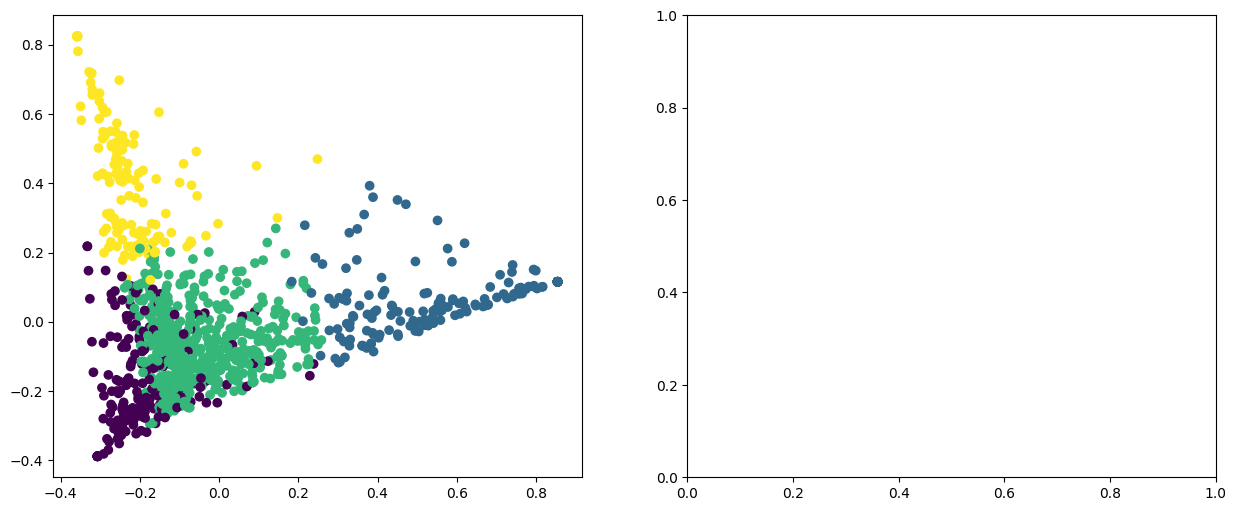

In [252]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score
import pandas as pd
import matplotlib.pyplot as plt

# Get the labels directly from the models (no need to add 1 here)
kmeans_labels = kmeans.labels_
kmedoids_labels = kmedoids.labels_

# Calculate similarity metrics
ari = adjusted_rand_score(kmeans_labels, kmedoids_labels)
ami = adjusted_mutual_info_score(kmeans_labels, kmedoids_labels)
nmi = normalized_mutual_info_score(kmeans_labels, kmedoids_labels)

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Adjusted Mutual Information: {ami:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")

# Create confusion matrix
confusion_matrix = pd.crosstab(
    pd.Series(kmeans_labels, name='K-means'),
    pd.Series(kmedoids_labels, name='K-medoids'),
    margins=True,
    margins_name='Total'
)

# Create normalized confusion matrix (by row)
norm_confusion = pd.crosstab(
    pd.Series(kmeans_labels, name='K-means'),
    pd.Series(kmedoids_labels, name='K-medoids'),
    normalize='index'
)

print("\nConfusion Matrix (counts):")
print(confusion_matrix)
print("\nConfusion Matrix (normalized by row):")
print(norm_confusion)

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means plot
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=kmeans_labels, cmap='viridis')
ax1.scatter(centroids[:, 0], centroids[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
ax1.set_title('K-means Clusters')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.legend()

# K-medoids plot
scatter2 = ax2.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=kmedoids_labels, cmap='viridis')
ax2.scatter(medoid_locations[:, 0], medoid_locations[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Medoids')
ax2.set_title('K-medoids Clusters')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.legend()

# Add colorbars
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Cluster')
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

# Optional: Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(10, 8))
import seaborn as sns
# Drop the "Total" row/column if present
if 'Total' in norm_confusion.index:
    norm_confusion = norm_confusion.drop('Total', axis=0)
if 'Total' in norm_confusion.columns:
    norm_confusion = norm_confusion.drop('Total', axis=1)

sns.heatmap(norm_confusion, annot=True, cmap='Blues', fmt='.2f')
plt.title('Normalized Confusion Matrix Between K-means and K-medoids')
plt.ylabel('K-means Cluster')
plt.xlabel('K-medoids Cluster')
plt.tight_layout()
plt.show()

# Somewhat good overlap of K-Means and K-Medoids with 7 PCs and 4 clusters. ARI=0.577; C1 (95.2%), C2 (94.4%), C3 (98.8%), C4 (38%) and (61.4%)

# Very good overlap of K-Means and K-Medoids with 9 PCs and 4 clusters. ARI=0.77; C1 (80.4% overlap), C2(88.5% overlap), C3 (95.6% overlap), C4 (100% overlap)

# Random Forest for a ML approach to "predicting" the clusters we got from the PCA a Cluster Analysis with the just the original (normalized) keywords.



Gives us the same picture as the PCA = Operator, Uncertainty, and Entanglement predict one cluster each, the fourth is predicted by a mix of words. Not sure we get any useful info here. **But the model fits extremely well all clusters from the original data, this is good robustness for the pca and clsuter approach we have.**

Top 20 most important features:
                  feature  importance
11           interference    0.279212
7            entanglement    0.276138
17            uncertainty    0.232487
15          superposition    0.032951
10          hilbert space    0.031697
1                collapse    0.028821
9             hamiltonian    0.021770
4           contextuality    0.018571
19          wave function    0.017249
14        dinger equation    0.011934
18  uncertainty principle    0.011546
3         complementarity    0.010517
5              eigenvalue    0.010424
2           commutativity    0.005587
6             eigenvector    0.004255
12    measurement problem    0.001846
20  wave-particle duality    0.001770
16              tunneling    0.001137
13        observer effect    0.000919
0             born's rule    0.000715

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        28
           2       0.98      1.00    

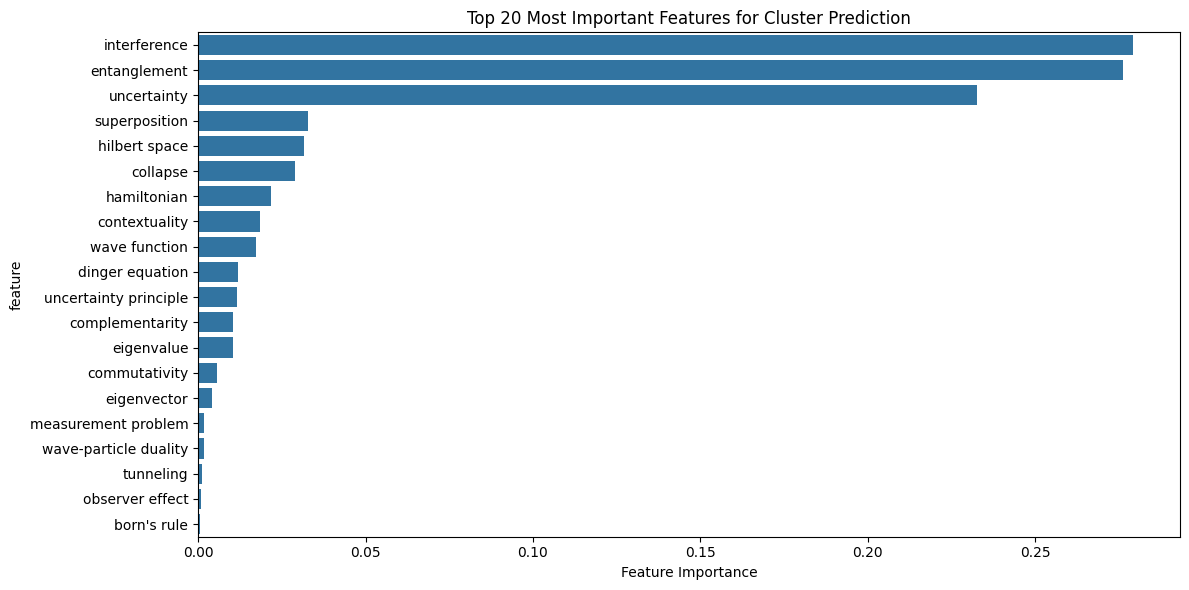

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = features
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 20 most important features
print("Top 20 most important features:")
print(feature_importance.head(20))

# Model performance
y_pred = rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# viz
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features for Cluster Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


=== ANALYSIS FOR CLUSTER 1 ===

Top 10 most important features for Cluster 1:
          feature  importance
11   interference    0.754924
7    entanglement    0.048739
17    uncertainty    0.032925
15  superposition    0.029716
10  hilbert space    0.022990
1        collapse    0.021850
9     hamiltonian    0.014263
19  wave function    0.012178
4   contextuality    0.010767
5      eigenvalue    0.009628

Classification Report for Cluster 1:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       202
           1       0.96      0.89      0.93        28

    accuracy                           0.98       230
   macro avg       0.97      0.94      0.96       230
weighted avg       0.98      0.98      0.98       230



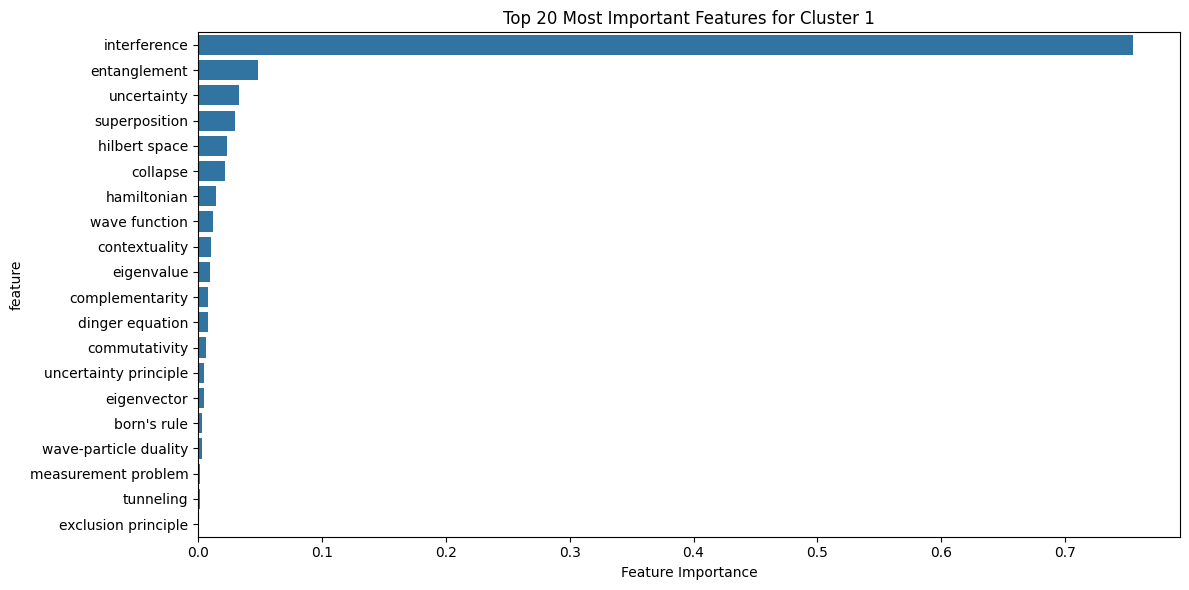


=== ANALYSIS FOR CLUSTER 2 ===

Top 10 most important features for Cluster 2:
            feature  importance
7      entanglement    0.738110
11     interference    0.050190
17      uncertainty    0.048603
10    hilbert space    0.024496
15    superposition    0.022180
9       hamiltonian    0.021180
1          collapse    0.018565
19    wave function    0.017739
4     contextuality    0.015202
14  dinger equation    0.012410

Classification Report for Cluster 2:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       0.97      0.97      0.97        40

    accuracy                           0.99       230
   macro avg       0.98      0.98      0.98       230
weighted avg       0.99      0.99      0.99       230



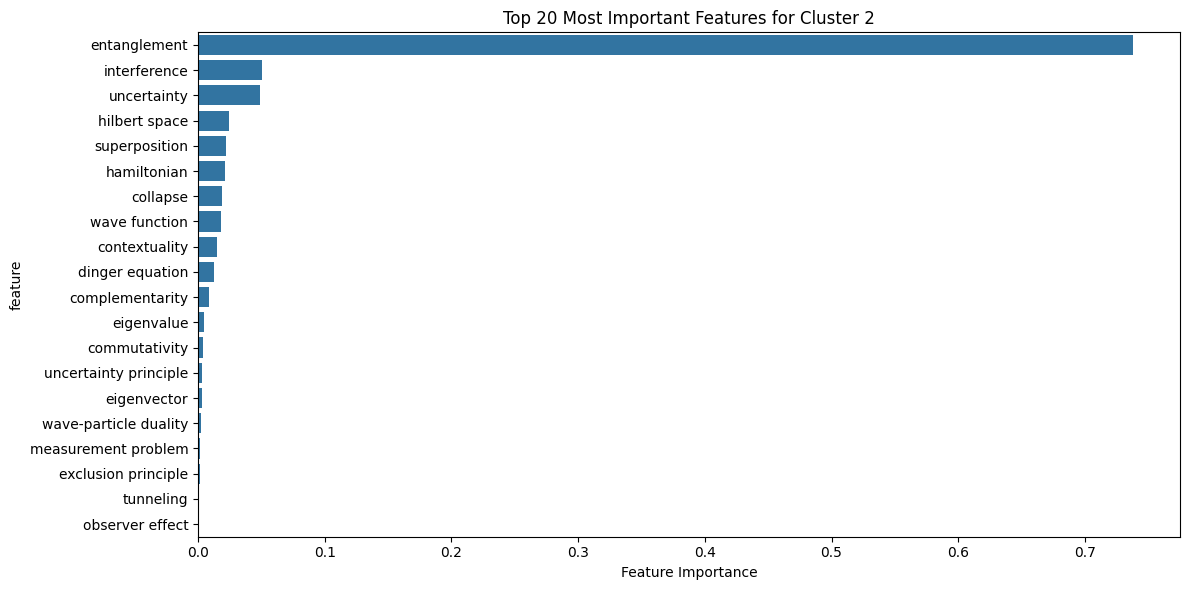


=== ANALYSIS FOR CLUSTER 3 ===

Top 10 most important features for Cluster 3:
            feature  importance
11     interference    0.241008
7      entanglement    0.234865
17      uncertainty    0.213941
15    superposition    0.048617
10    hilbert space    0.048364
1          collapse    0.044396
9       hamiltonian    0.035229
4     contextuality    0.028684
19    wave function    0.023955
14  dinger equation    0.017929

Classification Report for Cluster 3:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        92
           1       0.98      0.99      0.98       138

    accuracy                           0.98       230
   macro avg       0.98      0.98      0.98       230
weighted avg       0.98      0.98      0.98       230



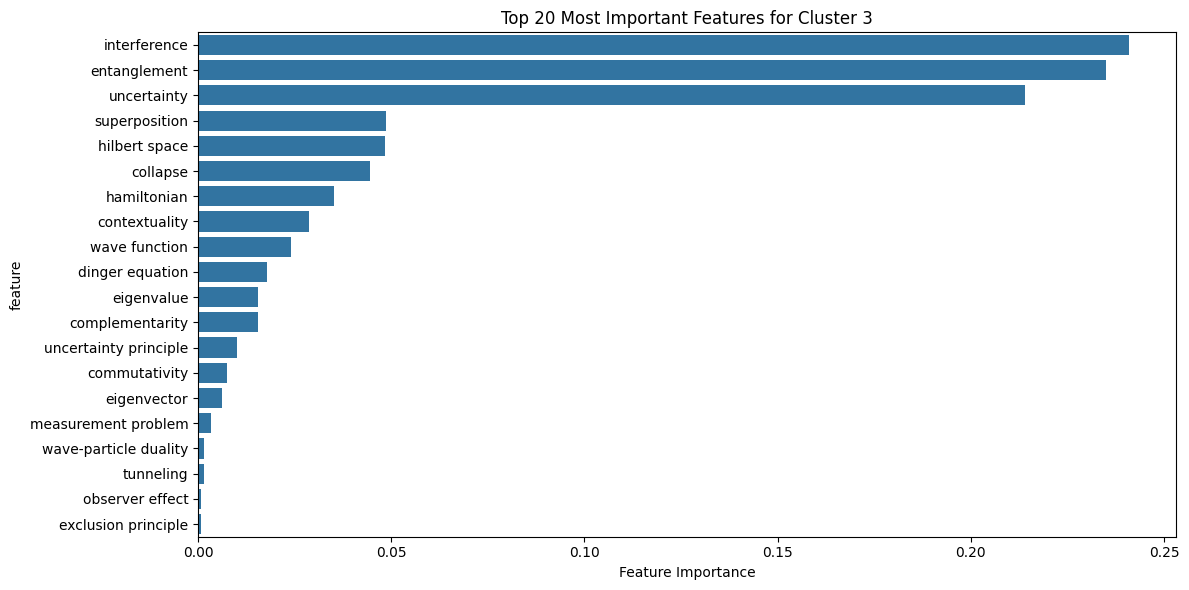


=== ANALYSIS FOR CLUSTER 4 ===

Top 10 most important features for Cluster 4:
                  feature  importance
17            uncertainty    0.718745
11           interference    0.046395
18  uncertainty principle    0.045190
7            entanglement    0.045024
15          superposition    0.025316
10          hilbert space    0.019756
1                collapse    0.016223
9             hamiltonian    0.014365
19          wave function    0.012117
4           contextuality    0.011967

Classification Report for Cluster 4:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       206
           1       1.00      0.92      0.96        24

    accuracy                           0.99       230
   macro avg       1.00      0.96      0.98       230
weighted avg       0.99      0.99      0.99       230



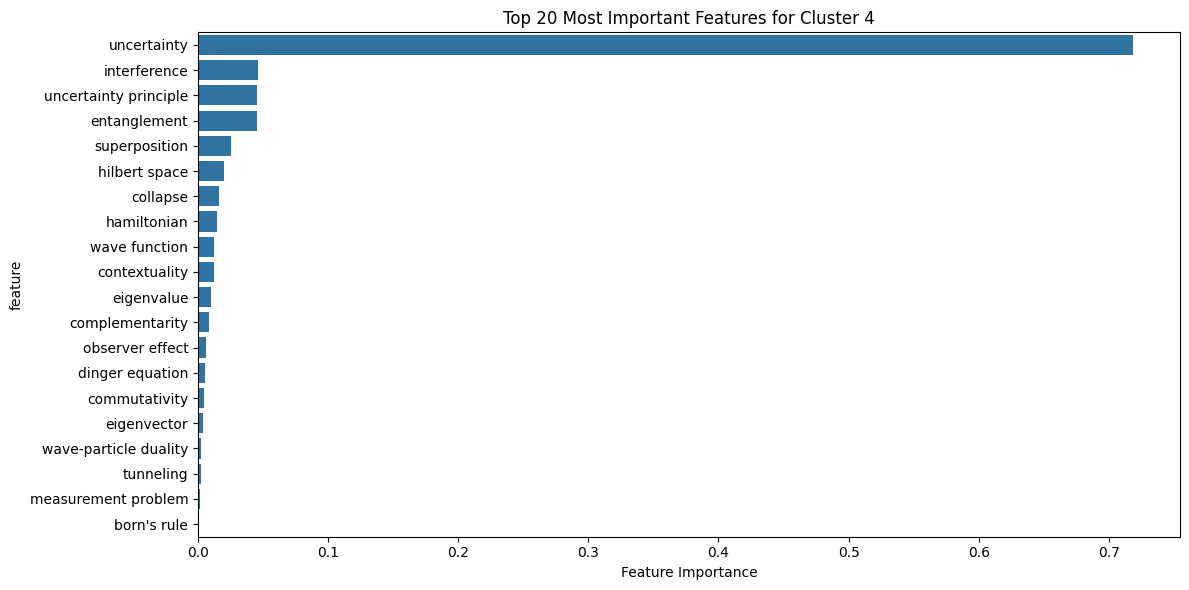

In [89]:
for cluster_num in range(1, 5):
    print(f"\n=== ANALYSIS FOR CLUSTER {cluster_num} ===")

    binary_labels = (df['cluster'] == cluster_num).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(
        features, binary_labels, test_size=0.2, random_state=42
    )
    rf = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf.fit(X_train, y_train)


    feature_importance = pd.DataFrame({
        'feature': features.columns,
        'importance': rf.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    ################################################

    # top 10 features for this cluster
    print(f"\nTop 10 most important features for Cluster {cluster_num}:")
    print(feature_importance.head(10))

    # Model performance
    y_pred = rf.predict(X_test)
    print(f"\nClassification Report for Cluster {cluster_num}:")
    print(classification_report(y_test, y_pred))

    # viz
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Most Important Features for Cluster {cluster_num}')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()